In [88]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.stats import pearsonr

In [89]:
# read all files
dfs = []
for file in os.listdir("../dataset/dataset/"):
    dfs.append((file.split('.')[0], pd.read_excel(f"../dataset/dataset/{file}")))

In [90]:
# get smallest feeding duration
durations = []
for df in dfs:
    durations.append(df[1][df[1]['label'] == 0].iloc[0]['timestamp'] - df[1][df[1]['label'] == 1].iloc[0]['timestamp'])
min(durations)/1000

56.16

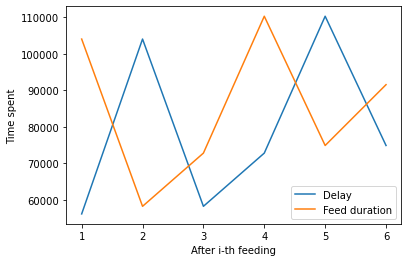

In [91]:
# compare duration and delay
delay = []
durations = []
timestamps = []
for df in dfs:
    timestamps.append((df[1][df[1]['label'] == 1].iloc[0]['timestamp'], df[1][df[1]['label'] == 0].iloc[0]['timestamp']))
timestamps.sort()
for i in range(len(timestamps)-1):
    delay.append(timestamps[i+1][0] - timestamps[i][1])
    durations.append(timestamps[i+1][1] - timestamps[i+1][0])
plt.plot([i+1 for i in range(len(delay))], delay, label='Delay')
plt.plot([i+1 for i in range(len(durations))], durations, label='Feed duration')
plt.xlabel('After i-th feeding')
plt.ylabel('Time spent')
plt.legend()
plt.show()

In [92]:
# get delay and duration correlation
corr, _ = pearsonr(delay, durations)
corr

-0.5899252354633207

In [93]:
print(delay)
print(durations)

[56160, 104000, 58240, 72800, 110240, 74880]
[104000, 58240, 72800, 110240, 74880, 91520]


[90071.8331138679, 71479.730500543, 39141.158099257125, -15007.990647630271, -103762.4779188803, -247422.87117859078]
[105938.1440155243, 96653.71266334504, 79082.98086203408, 48364.94714567726, -3213.004540885566, -87887.95061728213]
[121804.45491718069, 121827.69482614707, 119024.803624811, 111737.88493898473, 97336.46883710907, 71646.96994402638]
[137670.76581883707, 147001.6769889491, 158966.62638758792, 175110.82273229217, 197885.94221510366, 231181.89050533477]
[153537.07672049344, 172175.65915175108, 198908.4491503648, 238483.7605255996, 298435.41559309827, 390716.8110666433]


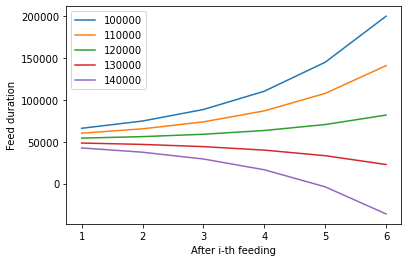

In [115]:
from sklearn.linear_model import LinearRegression
data = [[i+1, delay] for i, delay in enumerate(delay)]
clf = LinearRegression()
model = clf.fit(data, durations)
feeder_delay = [100000 + i * 10000 for i in range(5)]
for fed_delay in feeder_delay:
    temp_data = []
    temp_delays = []
    temp_delay = fed_delay
    for i in range(1, 7):
        pred = model.predict([[i, temp_delay]])
        pred = pred.tolist()
        temp_data.extend(pred)
        temp_delay = temp_delay - (pred[-1] - 56160)
        temp_delays.append(temp_delay)
    print(temp_delays)
    plt.plot([i for i in range(1,7)], temp_data, label=fed_delay)
plt.legend()
plt.xlabel('After i-th feeding')
plt.ylabel('Feed duration')
plt.show()

In [99]:
110240-60081.06452284

50158.93547716

In [59]:
60081.06452284-56160

3921.0645228400026

In [61]:
110240-3921.0645228400026

106318.93547716